Part 1: Data Analysis

1. Data Exploration & Cleansing

(a) Are there any data quality issues in the dataset? What steps would you take to clean or refine the data?

In [3]:
# Step 1: Load dataset
import os
import pandas as pd
file_path = 'Downloads/dummy dataset.txt'
data = pd.read_csv(file_path, sep = "|")

#Display sample data
data.head()

,trn_no,acc_no,cus_no,brn_cd,trn_type,trn_dt,trn_time,amt,trn_desc,chn,gndr,age
0,1000397185520021516,135566817347,6.911975e+09,449836,DEBIT,2023-06-10T00:00:00.000Z,150515,100.0,PAYMENT,IB,FEMALE,51.0
1,10009448378864689316,183264629830,9.919501e+09,339201,DEBIT,2023-07-11T00:00:00.000Z,33714,500.0,FUND TRANSFER,IB,MALE,53.0
2,10014592218323117335,463122589215,9.926739e+09,449836,DEBIT,2023-08-27T00:00:00.000Z,155150,300.0,PAYMENT,IB,FEMALE,53.0
3,10017545544944981640,461697795470,4.349273e+09,339201,CREDIT,2023-07-29T00:00:00.000Z,215843,5000.0,FUND TRANSFER,IB,MALE,56.0
4,10026211495480008202,513072841203,5.591584e+09,449836,CREDIT,2023-07-28T00:00:00.000Z,125259,70.0,FUND TRANSFER,IB,MALE,48.0


In [4]:
#Step 2: Checking for missing values
missing_values=data.isnull().sum()
missing_values

trn_no        0
acc_no        0
cus_no        2
brn_cd        0
trn_type      0
trn_dt        0
trn_time      0
amt           0
trn_desc      0
chn         419
gndr          3
age           2
dtype: int64

In [7]:
# Step 3: Handle missing values
data.dropna(subset=['cus_no'], inplace=True)
data['chn'] = data['chn'].fillna(data['chn'].mode()[0])
data['gndr'] = data['gndr'].fillna(data['gndr'].mode()[0])
data['age'] = data['age'].fillna(data['age'].median())

In [8]:
#Step 4: Checking for duplicate values
duplicate_values=data[data.duplicated()]
len(duplicate_values)

4980

In [9]:
# Step 5: Remove duplicate values
data = data.drop_duplicates()
data.head()

,trn_no,acc_no,cus_no,brn_cd,trn_type,trn_dt,trn_time,amt,trn_desc,chn,gndr,age
0,1000397185520021516,135566817347,6.911975e+09,449836,DEBIT,2023-06-10T00:00:00.000Z,150515,100.0,PAYMENT,IB,FEMALE,51.0
1,10009448378864689316,183264629830,9.919501e+09,339201,DEBIT,2023-07-11T00:00:00.000Z,33714,500.0,FUND TRANSFER,IB,MALE,53.0
2,10014592218323117335,463122589215,9.926739e+09,449836,DEBIT,2023-08-27T00:00:00.000Z,155150,300.0,PAYMENT,IB,FEMALE,53.0
3,10017545544944981640,461697795470,4.349273e+09,339201,CREDIT,2023-07-29T00:00:00.000Z,215843,5000.0,FUND TRANSFER,IB,MALE,56.0
4,10026211495480008202,513072841203,5.591584e+09,449836,CREDIT,2023-07-28T00:00:00.000Z,125259,70.0,FUND TRANSFER,IB,MALE,48.0


In [10]:
#Step 6: Checking for data types
print("Data Type:\n",data.dtypes)

Data Type:
 trn_no       object
acc_no        int64
cus_no      float64
brn_cd        int64
trn_type     object
trn_dt       object
trn_time      int64
amt         float64
trn_desc     object
chn          object
gndr         object
age         float64
dtype: object


In [11]:
# Step 7: Converting data types
data['trn_dt'] = pd.to_datetime(data['trn_dt'])
data['cus_no'] = data['cus_no'].astype('int64')
data['age'] = data['age'].astype('int64')
print(data.dtypes)

trn_no                   object
acc_no                    int64
cus_no                    int64
brn_cd                    int64
trn_type                 object
trn_dt      datetime64[ns, UTC]
trn_time                  int64
amt                     float64
trn_desc                 object
chn                      object
gndr                     object
age                       int64
dtype: object


Summary : 

- The dataset contains missing values in the cus_no, chn, gndr, and age columns.
- To clean the data:
    1. Rows with missing cus_no were dropped as it's important for identifying transactions
    2. Missing values in chn and gndr were filled with respective modes
    3. Missing age values were replaced with median
    4. Duplicates were removed to ensure data consistency.
    5. Data types were adjusted, such as converting trn_dt to datetime and correcting numerical columns to the proper type.

(b) What are the key characteristics of the dataset? Summarise the distribution of transactions, key statistics, and any anomalies you notice.

1. Key Statistic

In [14]:
# Summary statistics for numerical columns
#- For columns: `acc_no`, `cus_no`, and `brn_cd` even though they are stored as integers,these columns are not suitable for statistical interpretation 
data.describe()

,acc_no,cus_no,brn_cd,trn_time,amt,age
count,1.565700e+04,1.565700e+04,15657.000000,15657.000000,15657.000000,15657.000000
mean,5.596690e+11,5.261938e+09,453604.062209,146072.835217,841.693246,51.447212
std,2.440171e+11,2.570458e+09,121589.711877,48228.634314,1639.206096,8.169194
min,1.165820e+11,1.027662e+09,143953.000000,32249.000000,0.100000,25.000000
25%,3.516733e+11,2.854104e+09,339201.000000,110019.000000,65.900000,46.000000
50%,5.379387e+11,4.825469e+09,449836.000000,144506.000000,200.000000,52.000000
75%,7.432619e+11,7.513228e+09,449836.000000,185229.000000,780.000000,57.000000
max,9.894913e+11,9.926739e+09,732189.000000,235742.000000,10000.000000,73.000000


In [15]:
#Summary statistics for categorical columns
print("Transaction type: \n",data['trn_type'].value_counts())
print("Channel: \n",data['chn'].value_counts())
print("Gender: \n",data['gndr'].value_counts())

Transaction type: 
 trn_type
DEBIT     12002
CREDIT     3655
Name: count, dtype: int64
Channel: 
 chn
IB             12419
MEPS            1189
POS             1113
FPX              727
BRNCH / ATM      209
Name: count, dtype: int64
Gender: 
 gndr
MALE      10196
FEMALE     5461
Name: count, dtype: int64


In [16]:
#Missing values
data.isnull().sum()

trn_no      0
acc_no      0
cus_no      0
brn_cd      0
trn_type    0
trn_dt      0
trn_time    0
amt         0
trn_desc    0
chn         0
gndr        0
age         0
dtype: int64

2. Summary of Distribution of Transaction

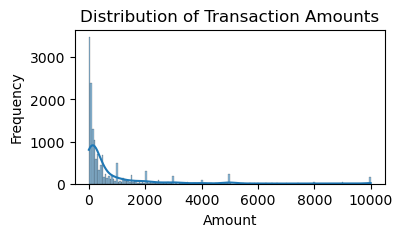

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,2))
sns.histplot(data['amt'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [18]:
#Grouping by transaction type
data.groupby('trn_type')['amt'].describe()

,count,mean,std,min,25%,50%,75%,max
trn_type,,,,,,,,
CREDIT,3655.0,1397.715461,2207.560144,0.1,126.0,480.000,1500.0,10000.0
DEBIT,12002.0,672.366367,1377.936374,0.1,55.0,167.125,540.0,10000.0


In [19]:
#Grouping by channel
data.groupby('chn')['amt'].describe()

,count,mean,std,min,25%,50%,75%,max
chn,,,,,,,,
BRNCH / ATM,209.0,3303.129187,2725.372866,10.00,1000.0,2800.00,5000.0,10000.0
FPX,727.0,484.692779,1674.915875,1.00,42.4,98.00,195.5,10000.0
IB,12419.0,952.774760,1692.295783,0.10,100.0,300.00,1000.0,10000.0
MEPS,1189.0,152.319571,412.616737,1.00,27.0,66.80,145.0,10000.0
POS,1113.0,109.656595,204.727384,0.55,29.9,52.65,100.0,2699.0


3. Identify anomalies

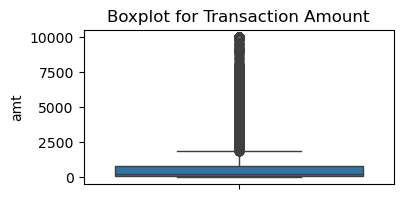

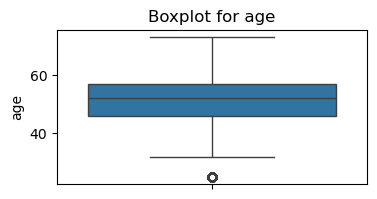

In [20]:
#Box plot for transaction amount 
plt.figure(figsize=(4,2))
sns.boxplot(data['amt'])
plt.title('Boxplot for Transaction Amount')
plt.show()

#Box plot for age
plt.figure(figsize=(4,2))
sns.boxplot(data['age'])
plt.title('Boxplot for age')
plt.show()

Summary:

1. Key Characteristics
    - Dataset Focus: Transaction amounts (amt)
    - Variables: For example includes cus_no (customer ID), amt (transaction amount), and trn_dt(transaction date).
    - Scale: Amounts that range from RM 0 to RM 10,000 (based on boxplot).
2. Distribution of Transactions
    - Majority Small Transactions: Most transactions are low-value (concentrated between RM0– RM2,500).
    - Median (~RM1,000) << Mean (likely skewed by outliers).
    - Right-Skewed: Long tail of few large transactions (up to RM 10,000).
3. Key Statistics
    - Median is approximately RM 1,000 where 50% of transactions below this.
    - Interquartile is approximately between RM 500 and RM2,500	where middle 50% of transactions.
    - Outliers is more than RM 7,500 where it is extremely high-value transactions.
4. Anomalies Detection
    - High-value outliers detected (based on boxplot)where transactions above RM 7,500 are rare. These are potentially fraud, bulk purchases, or errors.
5. Business Implications
    - Fraud Risk: Investigate outliers (>RM 7,500) for legitimacy.
    - Customer Segmentation:
        - Many small transactions may be represented by individuals
        - Few large transactions may be represented by the B2B or wholesale clients.


2. Transaction Volume & Trends

    (a) What is the average transaction amount? How many transactions do customers make per month on average?

In [23]:
#Average transaction amount
print('Average transaction amount: ',data['amt'].mean())

#How many transaction per month on average
data['month_year'] = data['trn_dt'].dt.to_period('M')  # Group by month

MonthlyTransaction = data.groupby('month_year').size() # Count number of transactions per month

AvgTransactionPerMonth = MonthlyTransaction.mean() # Calculate the average

print('Transaction per month on average:', AvgTransactionPerMonth)

Average transaction amount:  841.693245832535
Transaction per month on average: 5219.0


C:\Users\NurNafeszaAsyiqinbin\AppData\Local\Temp\ipykernel_4856\3937848972.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['month_year'] = data['trn_dt'].dt.to_period('M')  # Group by month


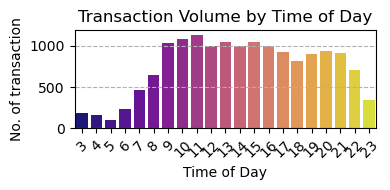

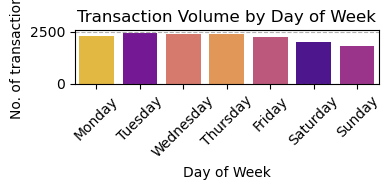

In [24]:
# Extracting hour from trn_time
data['hour'] = data['trn_time'] // 10000

#Plot count of transaction by hour
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,2))
sns.countplot(x='hour', data=data, hue= 'hour', palette='plasma', legend=False)
plt.title('Transaction Volume by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('No. of transaction')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--')
plt.tight_layout()
plt.show()

#Extract day from trn_dt
data['dayOfweek']=data['trn_dt'].dt.day_name()

#Plot count of transaction by day of week
plt.figure(figsize=(4,2))
sns.countplot(x='dayOfweek', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'], hue='dayOfweek', palette='plasma', legend=False)
plt.title('Transaction Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No. of transaction')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


3. Banking Context: Malaysia-Specific Transactions
   
(a) What aspects of the dataset reflect banking transactions unique to Malaysia?

    1. Channel code (chn): IB, ATM, MB refer to Internet Banking, Automated Teller Machine, and Mobile Banking which is common in Malaysia's banking ecosystem.
    2. Transaction Descriptions (trn_desc):
    Descriptions like "FUND TRANSFER", "PAYMENT", "TOP-UP" align with common local banking services in Malaysia (e.g., DuitNow, JomPAY, reloads).
    3. Branch Codes (brn_cd): Where these represent the actual bank branch codes in Malaysia.


(b) If you could add one more column to better represent banking transactions in Malaysia, what would it be and why?

    Region column. 
    
    It's useful for fraud detection where it allows to track any unusual transactions like high-value payments in the regions. Furthermore, it is also helpful for market analysis which able to identify regional trends as more cash withdrawals in rural areas versus digital payments in the cities.


Part 2: Dataset Analysis

1. Customer Behaviour Analysis

    a) Which transaction channel is used the most, and why do you think that is?

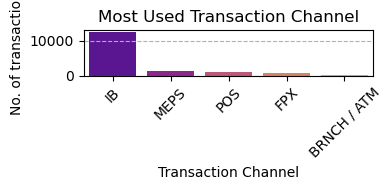

In [25]:
# Transaction channel used the most
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,2))
sns.countplot(x='chn', data=data, hue= 'chn', palette='plasma', legend=False)
plt.title('Most Used Transaction Channel')
plt.xlabel('Transaction Channel')
plt.ylabel('No. of transaction')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--')
plt.tight_layout()
plt.show()

Summary :

The countplot above shows that the most frequently used transaction channel is Internet Banking (IB)

This is possibly due to the increasing popularity and convenience of online banking services in Malaysia. With widespread usage of smartphone, improved internet access, and digitalization of financial services through easily accessible mobile apps and website with just few clicks, many users prefer to do transaction via online platforms rather than visiting physical branches or ATMs.



b) Identify one key transaction trend or pattern in your dataset. Why is this trend important?

    - Key Trend: Transaction Volume by Time of Day & Day of Week

    Based on the analysis of the dataset, two significant trends are observed:

    1. Peak Transaction Volume Around Midday (10 AM to 2 PM): Transactions are most frequent during the midday hours, where it indicate that users tend to do transactions during their working hours. 
    2. Higher Transaction Volume on Weekdays (Monday to Friday): The dataset shows that the number of transactions is significantly higher on weekdays compared to weekends. This is likely due to work-related transactions, business operations, and regular financial activities that run primarily on weekdays.



2. Transaction Insights

   (a) If you were asked to forecast transaction trends for the next quarter, what factors would you consider, and what approach would you take?

    To forecast transaction trends for the next quarter, I would consider the following factors:

    - Historical Transaction Data: Past transaction amounts, frequency, and seasonality like festivals, holiday and weekend spikes.
    - Economic & Market Conditions: Inflation rates, consumer spending trends, and industry-specific influences like retails, travel seasonality
    - Customer Behavior: Purchasing patterns, customer segments and loyalty trends.
    - Promotions & External Events: Discounts, marketing campaigns, or monthly or weekly events that could impact spending.
      
    
    (b) Describe the methodology you would use (e.g., statistical methods, machine learning, business intuition).

    - Methodology for Forecasting
        - 1. Data Preparation: Clean data such as handle missing values, remove outliers if needed. Additionally, aggregate transactions by day/week/month for trend analysis.
        - 2. Exploratory Analysis (EDA
        - 3. Forecasting Approach: Time Series Models, Machine Learning and Deep Learning

3. Technical Considerations & Data Quality

   (a) What are some potential data quality issues that could arise when collecting transaction data? How would you address them?
    1. Missing Data
       - Issue: Transactions with null/blank values
       - Causes: Possibly due to system errors during recording, manual entry mistakes and network failures during the data transmission.
       - Possible solutions:
            1. Fill missing numerical values
            2. Drop incomplete data records if negligible

    2. Duplicate Transactions
        - Issue: Same transaction recorded multiple times (e.g., due to system retries or batch errors).
        - Causes: Possibly due to payment processing retries.
       - Possible solutions:
            1. Use unique keys to filter duplicates.

    3. Outliers & Anomalies
        - Issue: Extreme values that distorting trends.
        - Causes: Might be due to fraudulent activity or data entry errors
        - Possible solutions:
            1. Remove values IQR bounds
            2. Set min/max thresholds

    (b) Write one SQL query to gain insight from your dataset (e.g., finding the most active customers, detecting large transactions). Explain what your query does and why it is useful.

        SELECT 
            cus_no,
            COUNT(*) AS TotalTransaction,
            MAX(amt) AS LargestTransaction
        FROM data
        GROUP BY cus_no
        ORDER BY TotalTransaction DESC

        - This query allows to groups the transactions by cus_no (customer ID) to analyze each customer's activity.
        - This query useful in identifying the high-value customers through total_spent and transaction_count that highlight customers' loyalty or targeted marketing. Furthermore, it also able to detect the customer spending patterns. Lastly, a high LargestTransaction might indicate fraud or bulk purchases.

4. Banking Context: Malaysia-Specific Transactions

(a) What aspects of the dataset reflect banking transactions unique to Malaysia?

    1. Channel code (chn): IB, ATM, MB refer to Internet Banking, Automated Teller Machine, and Mobile Banking which is common in Malaysia's banking ecosystem.
    2. Transaction Descriptions (trn_desc):
    Descriptions like "FUND TRANSFER", "PAYMENT", "TOP-UP" align with common local banking services in Malaysia (e.g., DuitNow, JomPAY, reloads).
    3. Branch Codes (brn_cd): Where these represent the actual bank branch codes in Malaysia.
   
(b) If you could add one more column to better represent banking transactions in Malaysia, what would it be and why?

    Region column. 
    
    It's useful for fraud detection where it allows to track any unusual transactions like high-value payments in the regions. Furthermore, it is also helpful for market analysis which able to identify regional trends as more cash withdrawals in rural areas versus digital payments in the cities.


5. SQL Challenge:

The bank wants to identify customers who have made multiple high-value withdrawals (above RM 5,000) in a row on different days, without deposits in between.
    
(a) Write an SQL query to find all accounts that have at least three consecutive withdrawal transactions exceeding RM 5,000, ordered by transaction date.

    SELECT acc_no FROM data
    WHERE trn_type = "DEBIT" AND amt > 5000
    GROUP BY acc_no
    HAVING COUNT(DISTINCT trn_dt) >= 3;

(b) Modify your query to detect four or more consecutive withdrawals instead of three.

    SELECT acc_no FROM data
    WHERE trn_type = "DEBIT" AND amt > 5000
    GROUP BY acc_no
    HAVING COUNT(DISTINCT trn_dt) >= 4;